<a href="https://colab.research.google.com/github/liang-faan/python-ml/blob/main/New_SML_3_mastery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SML 3**

**Please "Save A Copy" in your google drive and work with your own copy**

Datasets are getting larger by the day. Algos are getting more complex by the day. This impacts ML work in 2 areas:
1. Size
2. Speed

Large datasets and models consume higher amounts of memory. Traditionally, data has to be moved into RAM before algorithms can be launched in the CPU. Most laptops come with 8 or 16GB of RAM, which is sufficient for most use-cases. Note that the entire wikipedia (text) is about 11.5GB in 2015 and 18GB today.

Thus, few datasets exceed 16GB in size. But if they do then what can we do?
1. Solve size problem by using Dask in place of Pandas. The commands and structures are almost exactly similar, just that Dask reads multiple data files as partitions.
> This means that you can process datasets as large as your hard disks can hold.
>
> This is similar to how hadoop and most big data programs work, but more flexible because of its pandas-like integration.
>
> Since most datasets we model on are seldom huge ones, so we will not cover dask in this curriculum. Also, its easy to pick up since its very pandas-like.

2. Solve speed problem by using parallel computing to speed up computation. The fastest device today that we can use to speed up model fitting is the GPU (video card).
> By default, each python instance itself uses 1 core to process instructions.
>
> Some models uses all your CPU cores (usually 2 to 4 for most laptops) and by default, this is activated in PyCaret.
>
> Some models can utilize GPU cores (Colab's T4 has 2560 cuda cores and 320 tensor cores), this is also supportable in PyCaret but we will require additional packages which we will be installing in this notebook.

It is also noteworthy to mention that DL packages like Tensorflow and PyTorch (we will be doing those in the USML curriculum) comes natively with GPU acceleration. It is only quite recent that ML algorithms receive GPU acceleration capabilities through Rapids.ai.

### Enable GPU acceleration

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

Check the output of `!nvidia-smi` to make sure you've been allocated a Tesla T4, P4, or P100.

In [ ]:
# Check GPU
!nvidia-smi

Sat Apr  1 06:21:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Setup:
This set up script:

1. Checks to make sure that the GPU is RAPIDS compatible
1. Installs the **current stable version** of RAPIDSAI's core libraries using pip, which are:
  1. cuDF
  1. cuML
  1. cuGraph
  1. xgboost

**This will complete in about 3-4 minutes**

Please use the [RAPIDS Conda Colab Template notebook](https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9) if you need to install any of RAPIDS Extended libraries, such as:
- cuSpatial
- cuSignal
- cuxFilter
- cuCIM

OR
- nightly versions of any library


In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 368, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 368 (delta 76), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (368/368), 101.61 KiB | 14.52 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 5.7 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.0

In [ ]:
# The lightgbm version installed in colab is CPU
# We need to uninstall it first:
!pip3 uninstall lightgbm -y

# to re-install the GPU version
!pip3 install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached lightgbm-3.3.5.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
Skipping wheel build for lightgbm, due to binaries being disabled for it.
  Running setup.py install for lightgbm ... done


### Install the typical packages

In [ ]:
# Install the additional packages
!pip3 install -U ydata-profiling pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 32.7 MB/s eta 0:00:00
     ━━━━━━━━

Impt: Remember to restart runtime!
Now we are ready to move forward with the ML workflow.

### Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pathlib import Path
from ydata_profiling import ProfileReport
from pycaret.classification import *

In [ ]:
data_path = Path('/content/drive/MyDrive/pcml_data/5SML')

In [ ]:
covid = pd.read_csv(data_path / 'covid_symptoms.csv')

In [ ]:
covid

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0
...,...,...,...,...,...,...
2570,99,0,90,0,0,1
2571,100,0,53,0,-1,1
2572,101,0,44,1,0,0
2573,102,0,97,0,-1,1


### Data Exploration

In [ ]:
covid.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Model Evaluation and Selection

In [ ]:
# categorical features

In [ ]:
covid_model = setup(
    data=covid,
    target='infectionProb',
    fix_imbalance=True,
    numeric_features=['fever', 'age'],
    categorical_features=['bodyPain','runnyNose', 'diffBreath'],
    use_gpu=True
)

,Description,Value
0,Session id,1583
1,Target,infectionProb
2,Target type,Binary
3,Original data shape,"(2575, 6)"
4,Transformed data shape,"(2599, 8)"
5,Transformed train set shape,"(1826, 8)"
6,Transformed test set shape,"(773, 8)"
7,Ordinal features,2
8,Numeric features,2
9,Categorical features,3


In [ ]:
# What are the models that are available, are the GPUs enabled?
models(internal=True)[['Name', 'Turbo', 'GPU Enabled']]

,Name,Turbo,GPU Enabled
ID,,,
lr,Logistic Regression,True,True
knn,K Neighbors Classifier,True,True
nb,Naive Bayes,True,False
dt,Decision Tree Classifier,True,False
svm,SVM - Linear Kernel,True,True
rbfsvm,SVM - Radial Kernel,False,True
gpc,Gaussian Process Classifier,False,False
mlp,MLP Classifier,False,False
ridge,Ridge Classifier,True,True


In [ ]:
# No preprocessing
top_models = compare_models(
    sort='AUC',
    n_select=3,
    include=['lr', 'knn', 'svm', 'rbfsvm', 'rf', 'xgboost','catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.5372,0.5406,0.4983,0.5329,0.5140,0.0735,0.0738,0.5530
catboost,CatBoost Classifier,0.5072,0.5102,0.4836,0.5001,0.4912,0.0137,0.0138,26.4420
lr,Logistic Regression,0.4878,0.0000,0.4938,0.4804,0.4866,-0.0242,-0.0243,0.3630
knn,K Neighbors Classifier,0.5144,0.0000,0.5141,0.5073,0.5101,0.0289,0.0290,0.3400
svm,SVM - Linear Kernel,0.5028,0.0000,0.6704,0.4967,0.5704,0.0098,0.0109,3.5870
rbfsvm,SVM - Radial Kernel,0.4839,0.0000,0.4466,0.4751,0.4597,-0.0332,-0.0333,0.9130


Processing:   0%|          | 0/35 [00:00<?, ?it/s]

[I] [06:43:55.553239] Unused keyword parameter: n_jobs during cuML estimator initialization
[W] [06:44:35.710534] Random state is currently ignored by probabilistic SVC
[W] [06:44:35.711900] Random state is currently ignored by probabilistic SVC


In [ ]:
# Preprocessing
covid_model = setup(
    data=covid,
    target='infectionProb',
    numeric_features=['fever', 'age'],
    categorical_features=['bodyPain','runnyNose', 'diffBreath'],
    normalize=True,
    transformation=True,
    polynomial_features=True,
    # feature_interaction=True,
    use_gpu=True,
)

,Description,Value
0,Session id,4414
1,Target,infectionProb
2,Target type,Binary
3,Original data shape,"(2575, 6)"
4,Transformed data shape,"(2575, 36)"
5,Transformed train set shape,"(1802, 36)"
6,Transformed test set shape,"(773, 36)"
7,Ordinal features,2
8,Numeric features,2
9,Categorical features,3


In [ ]:
get_config('X_train')

,fever,bodyPain,age,runnyNose,diffBreath
2398,99,0,85,1,0
288,100,0,58,0,1
1534,104,0,20,0,-1
1983,100,1,82,1,-1
938,102,1,68,0,1
...,...,...,...,...,...
2092,101,1,5,1,0
1518,103,1,44,0,1
826,99,1,35,1,-1
107,98,1,63,0,1


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.5355,0.5471,0.5153,0.5305,0.5212,0.0708,0.0712,34.4050
gbc,Gradient Boosting Classifier,0.5344,0.5402,0.5288,0.5269,0.5263,0.0689,0.0693,0.7660
et,Extra Trees Classifier,0.5300,0.5312,0.5107,0.5250,0.5173,0.0596,0.0597,1.2630
xgboost,Extreme Gradient Boosting,0.5250,0.5434,0.5073,0.5206,0.5132,0.0496,0.0498,0.5890
dt,Decision Tree Classifier,0.5106,0.5123,0.4735,0.5048,0.4882,0.0202,0.0203,0.2740
knn,K Neighbors Classifier,0.5100,0.0000,0.5006,0.5025,0.5007,0.0198,0.0200,0.2620
qda,Quadratic Discriminant Analysis,0.5083,0.5063,0.6051,0.5034,0.5412,0.0191,0.0205,0.4890
lightgbm,Light Gradient Boosting Machine,0.5078,0.5267,0.5028,0.5024,0.5019,0.0157,0.0157,3.4880
ridge,Ridge Classifier,0.5067,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2130
dummy,Dummy Classifier,0.5067,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2600


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[I] [06:54:14.457539] Unused keyword parameter: n_jobs during cuML estimator initialization


In [ ]:
# Preprocessing
reduce_process_covid_model = setup(
    data=covid,
    target='infectionProb',
    numeric_features=['fever', 'age'],
    categorical_features=['bodyPain','runnyNose', 'diffBreath'],
    normalize=True,
    # transformation=True,
    # polynomial_features=True,
    # feature_interaction=True,
    use_gpu=True,
)

,Description,Value
0,Session id,3881
1,Target,infectionProb
2,Target type,Binary
3,Original data shape,"(2575, 6)"
4,Transformed data shape,"(2575, 8)"
5,Transformed train set shape,"(1802, 8)"
6,Transformed test set shape,"(773, 8)"
7,Ordinal features,2
8,Numeric features,2
9,Categorical features,3


In [ ]:
compare_models(include=['lr', 'knn','svm','xgboost','lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.5338,0.5348,0.5040,0.5295,0.5161,0.0669,0.0671,0.6320
knn,K Neighbors Classifier,0.5183,0.0000,0.5074,0.5122,0.5093,0.0364,0.0364,0.3230
lightgbm,Light Gradient Boosting Machine,0.5128,0.5313,0.4938,0.5062,0.4992,0.0250,0.0251,0.5890
lr,Logistic Regression,0.4966,0.0000,0.4128,0.4919,0.4476,-0.0087,-0.0079,0.3560
svm,SVM - Linear Kernel,0.4950,0.0000,0.6591,0.4918,0.5628,-0.0057,-0.0069,4.0680


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

[I] [07:03:21.270695] Unused keyword parameter: n_jobs during cuML estimator initialization


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [ ]:
# Note that PyCaret automatically performs 10 fold CV
best_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5912,0.5800,0.5730,0.5862,0.5795,0.1818,0.1818
1,0.5138,0.5282,0.5393,0.5053,0.5217,0.0284,0.0285
2,0.5611,0.5625,0.5169,0.5610,0.5380,0.1214,0.1217
3,0.4722,0.4978,0.4270,0.4634,0.4444,-0.0566,-0.0568
4,0.5556,0.5185,0.5169,0.5542,0.5349,0.1103,0.1106
5,0.5167,0.5029,0.5169,0.5111,0.5140,0.0333,0.0333
6,0.5444,0.5773,0.5169,0.5412,0.5287,0.0883,0.0884
7,0.4444,0.4255,0.4045,0.4337,0.4186,-0.1121,-0.1123
8,0.5389,0.5275,0.4944,0.5366,0.5146,0.0769,0.0771


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Hyperparameter Tuning

In [ ]:
tuned_model = tune_model(
    best_model,
    choose_better=True,
    search_library='optuna',
    n_iter=50,
    optimize='AUC',
    early_stopping=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4917,0.5596,0.9551,0.4913,0.6489,-0.0014,-0.0036
1,0.5083,0.5007,0.9775,0.5000,0.6616,0.0314,0.0826
2,0.5000,0.5563,0.9663,0.4971,0.6565,0.0101,0.0265
3,0.4833,0.4782,0.9101,0.4880,0.6353,-0.0237,-0.0447
4,0.4833,0.5545,0.9326,0.4882,0.6409,-0.0232,-0.0512
5,0.4944,0.5407,0.9438,0.4941,0.6486,-0.0012,-0.0027
6,0.5278,0.5678,0.9888,0.5116,0.6743,0.0650,0.1594
7,0.5111,0.4341,0.9663,0.5029,0.6615,0.0319,0.0739
8,0.5056,0.5407,0.9551,0.5000,0.6564,0.0208,0.0458


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-01 07:05:17,527] Searching the best hyperparameters using 1802 samples...
[I 2023-04-01 07:15:46,848] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Test the tuned model on the last set of unseen data

In [ ]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.5278,0.5308,0.5131,0.5227,0.5178,0.0553,0.0553


,fever,bodyPain,age,runnyNose,diffBreath,infectionProb,prediction_label,prediction_score
406,98,0,61,0,0,0,1,0.8823
2133,100,0,87,0,-1,0,1,0.7765
220,98,0,8,1,0,0,1,0.7736
330,99,1,87,1,-1,0,1,0.5283
752,104,0,3,1,0,0,0,0.8986
...,...,...,...,...,...,...,...,...
1153,102,1,55,0,1,0,0,0.7374
2247,104,0,22,1,0,0,0,0.7864
77,103,1,31,1,-1,0,0,0.5842
2283,102,0,88,0,-1,0,1,0.8874


### Retrain the model on all data

So that our model uses all existing known data for future predictions.
Else, our model is only trained on a subset of all known data.

Note that this is after we have done all the evaluation. Testing on the final model will not give the correct metrics (since there is no unseen data)


In [ ]:
final_model = finalize_model(tuned_model)

### Save the model

In [ ]:
save_model(final_model, 'covid_prediction_xgb_tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['fever', 'age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     inclu...
                                grow_policy=None, importance_type=None,
                                interaction_

### Deployment Workflow

After passing the model file to the software engineer, he may ask you how do I use it?

First, he has to install pycaret the way you did. Next, load the data.

In [ ]:
latest_model = load_model(data_path / 'covid_prediction_xgb_tuned')

Transformation Pipeline and Model Successfully Loaded


Then, he has to format users' input into the format that your original dataset uses.

Recap: Data format for webservice is almost always json. Json looks exactly like a Python dictionary.

In [ ]:
# Converting json format to python dictionary is easy using the json library.
# Your software engineer should know this.
user_input = [{
    'fever': 104,
    'bodyPain': 1,
    'age': 56,
    'runnyNose': 0,
    'diffBreath': 1
}]

# Convert the dictionary into a pandas observation
user_request = pd.DataFrame(user_input)

Pass the data into the model to get the prediction

In [ ]:
predict_model(latest_model, user_request)

# The predicted probability is in the last column

,fever,bodyPain,age,runnyNose,diffBreath,prediction_label,prediction_score
0,104,1,56,0,1,1,0.9952


### Explaining our model
The above development-deployment workflow is done. Now we need to explain our model to the higher-ups, the public, and non-data trained people.

Here, I will cover a number of useful visualizations both for technical (statistical) audience and also business audiences.

In [ ]:
%matplotlib inline

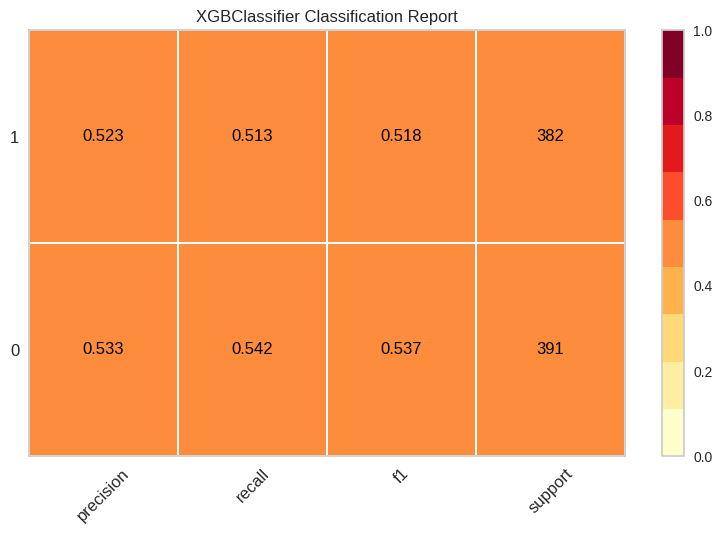

In [ ]:
plot_model(best_model, plot='class_report')

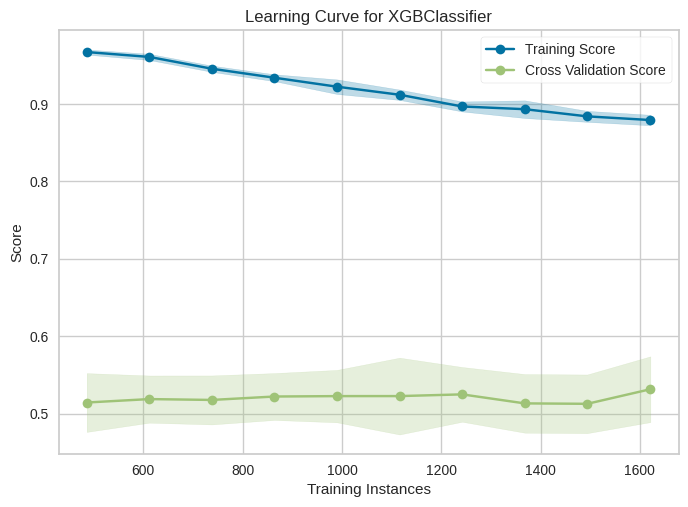

In [ ]:
# differences between learning and validation curve
# https://datascience.stackexchange.com/questions/62303/difference-between-learning-curve-and-validation-curve
plot_model(best_model, plot='learning')

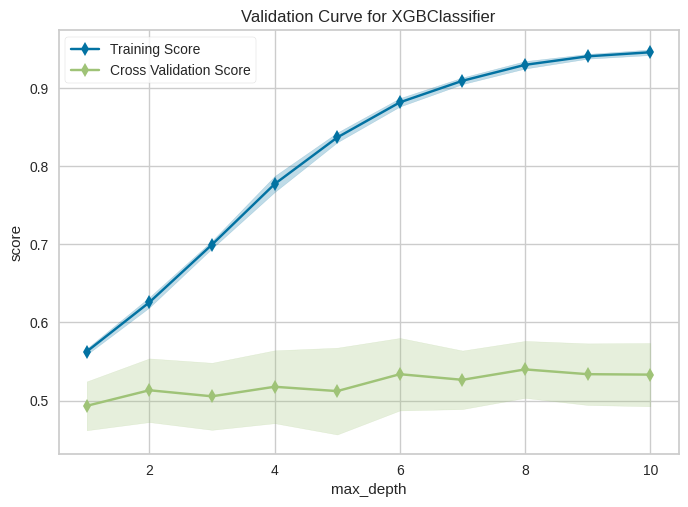

In [ ]:
plot_model(best_model, plot='vc')

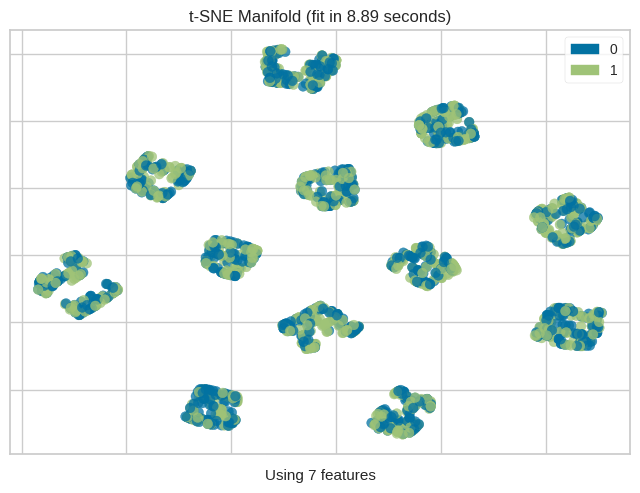

In [ ]:
# manifold learning
# whether features are clustered together for 0 and 1
plot_model(best_model, plot='manifold')

In [ ]:
# recursive feature selection
plot_model(best_model, plot='rfe')

KeyboardInterrupt: ignored

In [ ]:
# Plot feature importance
plot_model(best_model, plot='feature')

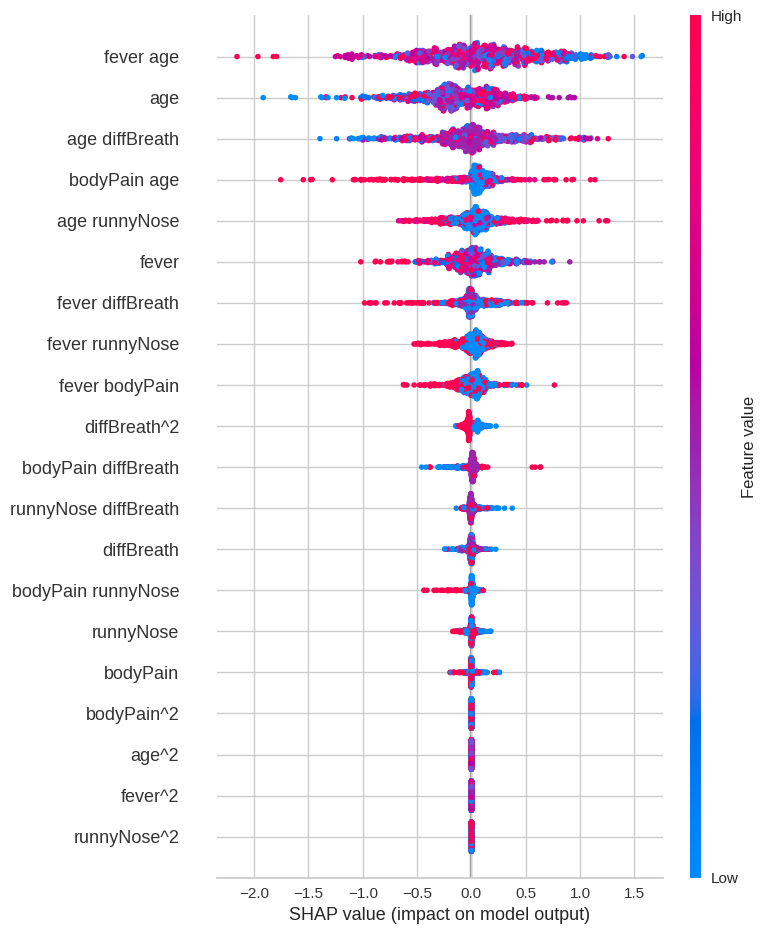

In [ ]:
# Plot a SHAP interpretation of the model
interpret_model(best_model)

The following plot comes from SHAP as well.

It tells us a number of things given an observation. We typically use it on specific observations that may be outliers or well-fitted:

The plot presents the analysis at each observation level.
model output value (0.22) is the prediction for that observation.
base value (0.5047) is the value predicted if we don't use any features.
red bar represents the features that increases the predicted value, while blue bar represents those that will decrease the predicted value.

In [ ]:
interpret_model(best_model, plot='reason', observation=100)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

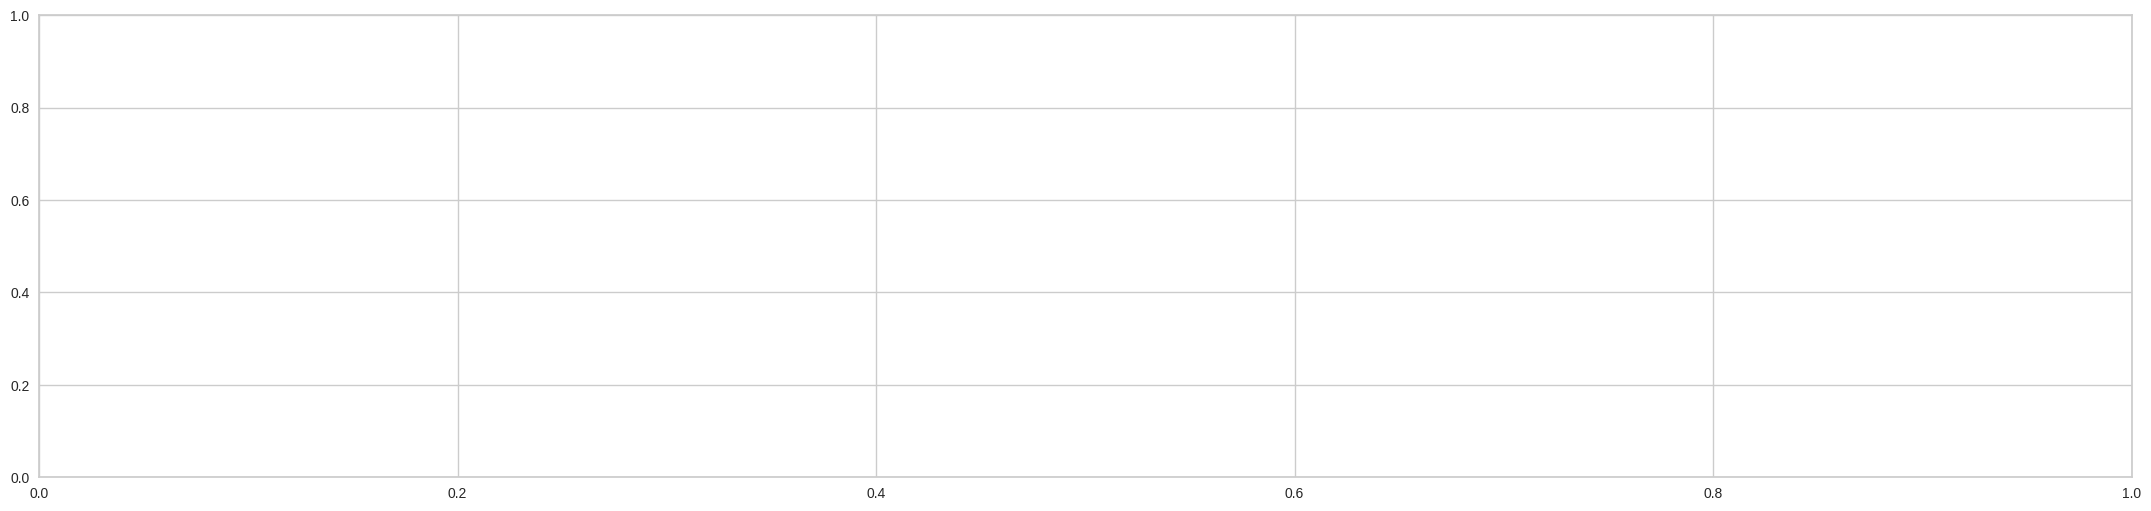

In [ ]:
# We can combine all of the above visualizations (sometimes don't work well...)
evaluate_model(best_model)